In [1]:
import numpy as np
from scipy.optimize import minimize

%matplotlib ipympl
import matplotlib.pyplot as plt
from tqdm import tqdm

from scipy.sparse import csr_matrix


In [2]:
import os

parent_dir = os.path.dirname(os.getcwd())
print(parent_dir)  # Prints parent directory

os.chdir(parent_dir)
#print(os.getcwd())  # Prints current working directory

import mmars

c:\Users\malth\OneDrive - Aarhus Universitet\Dokumenter\AAU-Studie\10. semester\NEW GIT\MMARS


In [ ]:
radar_model_1 = mmars.FmcwRadar(position=np.array([[5,0]]), signalNoiseRatio=[10, 10], N_chirps=1)
#radar_model_2 = mmars.FmcwRadar(position=np.array([[0,10]]), signalNoiseRatio=[10, 10], N_chirps=1)
#radar_model_3 = mmars.FmcwRadar(position=np.array([[0,20]]), signalNoiseRatio=[10, 10], N_chirps=1)

## Setting up the target

In [4]:
T_frame = 0.1

target_model_1 = mmars.Target(start_position=np.array([[0.001,5.101]]), start_velocity=1., T_total=100., T_frame=T_frame)

target_model_1.generate_trajectory(trajectory_type="linear")

target_ground_truth = target_model_1.get_trajectory()

print(radar_model_1.get_parameters)

mrblatcomp = mmars.MRBLaT_Functions(radar_model_1.get_parameters)

{'position': array([[0, 0]]), 'tx_antennas': array([[-0.02336045,  0.        ],
       [-0.01557363,  0.        ],
       [-0.00778682,  0.        ]]), 'rx_antennas': array([[-0.00292006,  0.        ],
       [-0.00097335,  0.        ],
       [ 0.00097335,  0.        ],
       [ 0.00292006,  0.        ]]), 'chirp_Rate': 30000000000000.0, 'T_between_chirps': 2.566e-05, 'f_carrier': 77000000000.0, 'N_samples': 256, 'f_sampling': 20000000.0, 'N_chirps': 1, 'transmitPower': 1, 'gain': 1, 'radarCrossSection': 1, 'signalNoiseRatio': [10, 10], 'standardDeviation': np.float64(2.763854534117991e-07), 'wavelength': 0.0038934085454545454, 'max_range': 99.93081933333333}


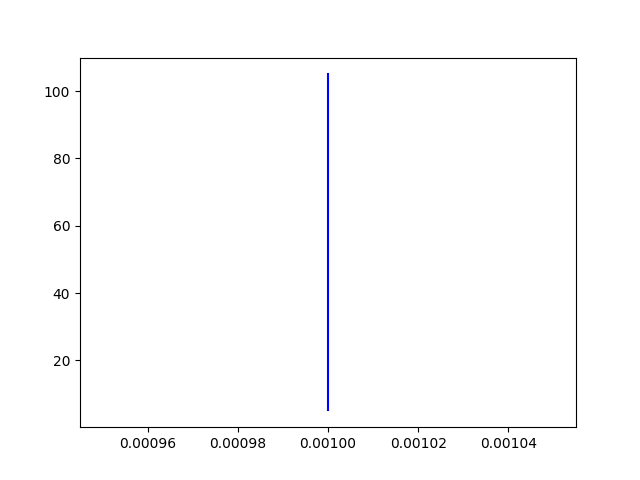

In [5]:
plt.figure()
plt.plot(target_ground_truth[0], target_ground_truth[1], label="Ground Truth", color="blue")

In [6]:
simulation_data_1 = mmars.Simulation(radar_model_1, target_model_1)
#simulation_data_2 = mmars.Simulation(radar_model_2, target_model_1)
#simulation_data_3 = mmars.Simulation(radar_model_3, target_model_1)

simulation_data_1.run()
#simulation_data_2.run()
#simulation_data_3.run()

Running simulation with <mmars.fmcwRadar.FmcwRadar object at 0x00000147FF699E80> and <mmars.target.Target object at 0x00000147FF23F560>


100%|██████████| 1000/1000 [00:01<00:00, 746.40it/s]


In [7]:
sim_data_1 = simulation_data_1.get_data()
#sim_data_2 = simulation_data_2.get_data()
#sim_data_3 = simulation_data_3.get_data()

# MRBLaT

In [8]:
first_try = mmars.Tracking([sim_data_1], [radar_model_1.get_parameters], np.array([[target_ground_truth[0][0]], [target_ground_truth[1][0]], [target_ground_truth[2][0]], [target_ground_truth[3][0]]]))

In [9]:
phi_bar, phi_bar_bar= first_try.run_mrblat(T_frame, N_frames=100, fifo_length=100)

[[4.97663955 0.        ]
 [4.98442637 0.        ]
 [4.99221318 0.        ]]
[[4.99707994 0.        ]
 [4.99902665 0.        ]
 [5.00097335 0.        ]
 [5.00292006 0.        ]]
[[5 0]]


  2%|▏         | 2/100 [00:00<00:37,  2.58it/s]c:\Users\malth\OneDrive - Aarhus Universitet\Dokumenter\AAU-Studie\10. semester\NEW GIT\MMARS\mmars\tracking.py:88: OptimizeWarning: Initial guess is not within the specified bounds
  D_KL_result = minimize(mrblat_functions_list[k].D_KL, x0_k, bounds = bound,  args=(data_fourier, x0_k[0], x0_k[1], (1,1,1,1), False), method='nelder-mead')
100%|██████████| 100/100 [01:02<00:00,  1.60it/s]


(-1.0, 30.0)

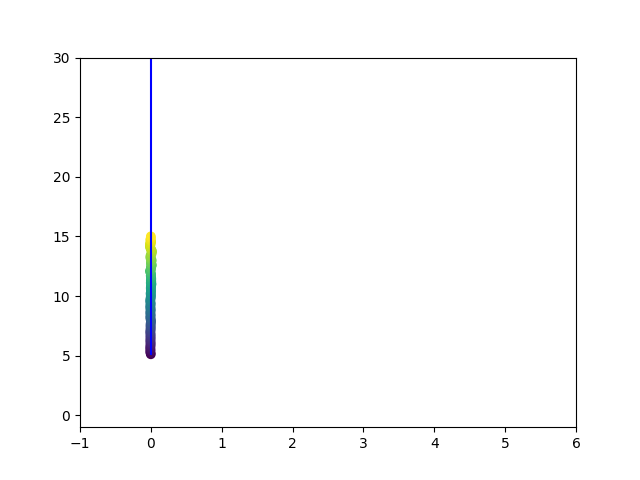

In [10]:
plt.figure()
plt.scatter(phi_bar[:, 0], phi_bar[:, 1], label="MRBLAT", c=np.linspace(0, 1, len(phi_bar[:, 0])), cmap='viridis', marker='o')
plt.plot(target_ground_truth[0][:500], target_ground_truth[1][:500], label="Ground Truth", color="blue")
plt.xlim(-1, 6)
plt.ylim(-1, 30)

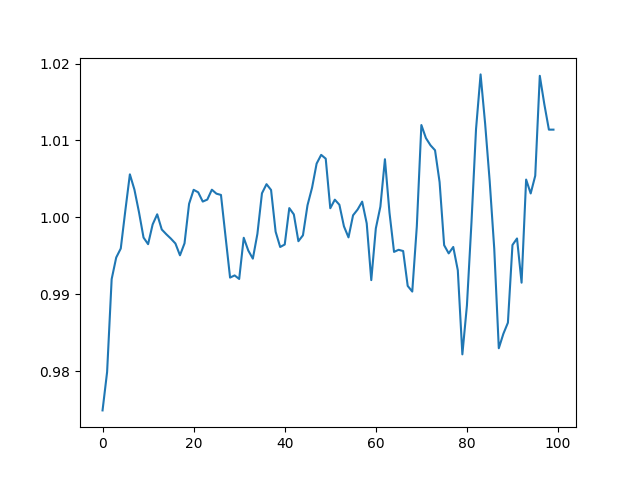

In [11]:
plt.figure()
plt.plot(phi_bar[:, 3])

In [12]:
np.sqrt(phi_bar_bar[:,0,0])

array([0.00291081, 0.00446317, 0.00259718, 0.00259718, 0.00259718,
       0.00317805, 0.00274868, 0.00259718, 0.00270405, 0.00262032,
       0.00259718, 0.00271982, 0.00266175, 0.00259718, 0.00272586,
       0.00269565, 0.00259718, 0.00259718, 0.00259718, 0.00263243,
       0.00286125, 0.00259718, 0.00293142, 0.00260807, 0.00395386,
       0.00422581, 0.00273986, 0.00431937, 0.00259718, 0.00300199,
       0.00259718, 0.00259718, 0.00260224, 0.00259718, 0.00260588,
       0.00262352, 0.00263267, 0.00259719, 0.00259718, 0.00259718,
       0.00268786, 0.00259718, 0.00259718, 0.00259718, 0.00329107,
       0.00259718, 0.00289595, 0.00259718, 0.00300405, 0.00273667,
       0.00351522, 0.00259718, 0.00262926, 0.00393289, 0.00381308,
       0.00279559, 0.00259718, 0.00437591, 0.00259718, 0.00259718,
       0.00268189, 0.00259718, 0.00288288, 0.00259718, 0.00261405,
       0.00282898, 0.00265947, 0.00259718, 0.00306224, 0.00259718,
       0.00275202, 0.00259718, 0.0026152 , 0.00288864, 0.00387

In [13]:
multi_phi_bar, multi_phi_barbar = multi_radar.run_mrblat(T_frame, fifo_length=20, N_frames=20, N_iter=100)
single_phi_bar, single_phi_barbar = single_radar.run_mrblat(T_frame, fifo_length=200, N_frames=20, N_iter=100)

NameError: name 'multi_radar' is not defined

NameError: name 'single_phi_bar' is not defined

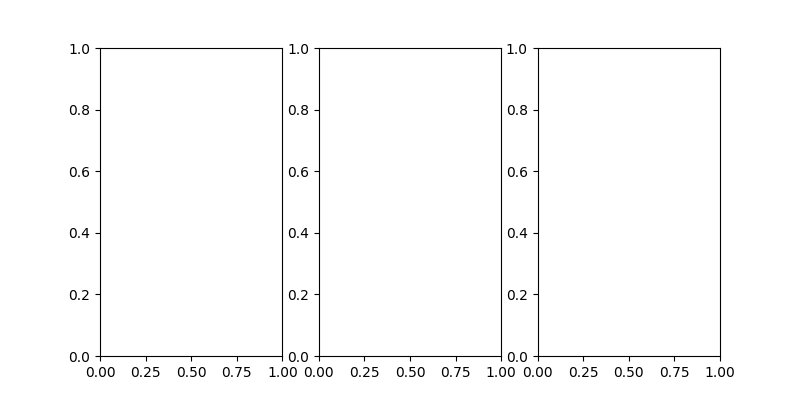

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4))
ax[0].scatter(single_phi_bar[:,0], single_phi_bar[:,1], label="BLAT")
ax[0].scatter(multi_phi_bar[:,0], multi_phi_bar[:,1], label="MRBLAT")
ax[0].scatter(target_ground_truth[0][:], target_ground_truth[1][:], label="Ground Truth", color="blue",s=1)
ax[0].set_title("Positions of MRBLAT and Ground Truth")
ax[0].set_xlabel("X Position (m)")
ax[0].set_ylabel("Y Position (m)")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(single_phi_bar[:,1], label="BLAT", marker="+", markersize=10)
ax[1].plot(multi_phi_bar[:,1], label="MRBLAT", marker="+", markersize=10)
ax[1].set_xlabel("Frame")
ax[1].set_ylabel("Y Position (m)")
ax[1].set_title("Y Position of MRBLAT")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(single_phi_bar[:,3], label="BLAT", marker="+", markersize=10)
ax[2].plot(multi_phi_bar[:,3], label="MRBLAT", marker="+", markersize=10)
ax[2].set_ylim(-.1, 2.1)
ax[2].set_xlabel("Frame")
ax[2].set_ylabel("Y-velocity (m/s)")
ax[2].set_title("Y-velocity of MRBLAT")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Lambda_z = np.eye(3072) * (Boltzmann * 290 * 0.77e9)**(-2)
Lambda_z = np.eye(3072) * (radar_model_1.get_standardDeviation)**(-2)
Lambda_z = csr_matrix(Lambda_z)

In [ ]:
radar_model_1.get_standardDeviation

np.float64(2.763854534117991e-07)

In [ ]:
sim_data_all_virtual = sim_data[frame,:,:,0,:]
sim_data_all_virtual = sim_data_all_virtual.flatten()[:, np.newaxis]

# Energy normalization
sim_data_all_virtual_energy = sim_data_all_virtual.conj().T @ sim_data_all_virtual
data_fourier = np.concatenate([np.fft.fft(sim_data_all_virtual[i:i+256, 0]) for i in range(0, len(sim_data_all_virtual), 256)])
data_fourier_energy = data_fourier.conj().T @ data_fourier
data_fourier = (np.sqrt(sim_data_all_virtual_energy/data_fourier_energy)*data_fourier).T

In [ ]:
last_frame_x = target_model_1.get_trajectory()[0][frame-1]
last_frame_y = target_model_1.get_trajectory()[1][frame-1]

param = (last_frame_x, last_frame_y, 1, 1)
bound = [(-100,100), (0.1,100), (0.00001, 10), (0.00001, 10)]

input = np.array([target_model_1.get_trajectory()[0][frame], target_model_1.get_trajectory()[1][frame], 0.5, 0.5])

result = minimize(mrblatcomp.D_KL, param, bounds = bound,  args=(data_fourier, last_frame_x, last_frame_y, (1,1,1,1), True), method='nelder-mead')
#mrblatcomp.D_KL(input, data_fourier, target_model_1.get_trajectory()[0][frame-1], target_model_1.get_trajectory()[0][frame-1], outputmode=(1,1,1,1), print_output=True)

[[-1563.55131744]] [[2539.39058108]] [[392.42214199]] 2.8378770664093453
[[-2340.12137051]] [[2419.17710236]] [[404.52110369]] 2.8378770664093453
[[-61.92939722]] [[2185.38530383]] [[311.70168758]] 2.8378770664093453
[[-1563.55131744]] [[2539.39058108]] [[400.03673104]] 2.8622721484940614
[[-1563.55131744]] [[2539.39058108]] [[404.42866003]] 2.8622721484940614
[[374.49786562]] [[2886.36666048]] [[516.27723318]] 2.8625696789997166
[[585.20665533]] [[2341.02934307]] [[353.25237197]] 2.8441076161599814
[[-2810.34665033]] [[2478.92378841]] [[398.78104132]] 2.8378770664093453
[[-2810.34665033]] [[2478.92378841]] [[402.67907648]] 2.850223372704531
[[-2810.34665033]] [[2478.92378841]] [[404.85253219]] 2.850223372704531
[[530.67782845]] [[2300.56253433]] [[355.62325787]] 2.8378770664093453
[[871.98529789]] [[2640.08308024]] [[456.45856945]] 2.850299586407903
[[-769.57623367]] [[2380.69785025]] [[378.435739]] 2.840997193745589
[[-506.21033943]] [[2550.33897872]] [[428.746478]] 2.847208393838229

In [ ]:
print(f"{result}\n{target_ground_truth[0][frame], target_ground_truth[1][frame]}")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -437.5806734015364
             x: [ 8.439e+00  1.499e+01  3.339e-03  2.138e-03]
           nit: 324
          nfev: 534
 final_simplex: (array([[ 8.439e+00,  1.499e+01,  3.339e-03,  2.138e-03],
                       [ 8.439e+00,  1.499e+01,  3.338e-03,  2.133e-03],
                       ...,
                       [ 8.439e+00,  1.499e+01,  3.340e-03,  2.146e-03],
                       [ 8.439e+00,  1.499e+01,  3.330e-03,  2.128e-03]]), array([-4.376e+02, -4.376e+02, -4.376e+02, -4.376e+02,
                       -4.376e+02]))
(np.float64(8.415709848078945), np.float64(15.000999999999966))


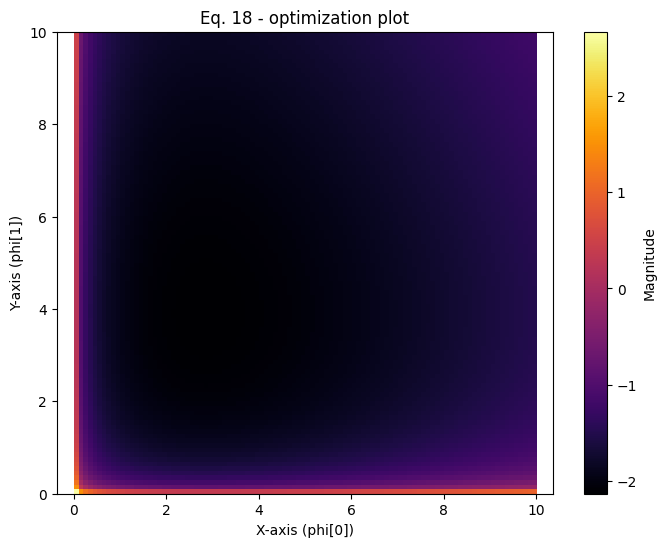

In [ ]:
D_KL_search_space = np.linspace(0.01, 10, 100)

# Use parallel processing to speed up the nested loop
results = []
for i in D_KL_search_space:
    for j in D_KL_search_space:
        result = mrblatcomp.D_KL(np.array([10.08, 10.11, i, j]), data_fourier, target_model_1.get_trajectory()[0][frame-1], target_model_1.get_trajectory()[0][frame-1], outputmode=(1,1,1,1), print_output=False)
        results.append(result)

# Compute the magnitude (ignoring phi[2] and phi[3])
#magnitudes = np.sqrt(phis[:, 0, 0]**2 + phis[:, 1, 0]**2)

gridsize = 100

# Reshape to 2D (51x51) for heatmap plotting
heatmap = np.array(results).reshape(gridsize, gridsize)
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap, origin='lower', extent=[0, 10, 0, 10], cmap='inferno', aspect='auto')
#min_index = np.argmin(heatmap)
#min_index_2d = np.unravel_index(min_index, heatmap.shape)
#plt.scatter(min_index_2d[1]/gridsize, min_index_2d[0]/gridsize, marker='x', color='red', s=100)
plt.colorbar(label="Magnitude")
plt.xlabel("X-axis (phi[0])")
plt.ylabel("Y-axis (phi[1])")
plt.title("Eq. 18 - optimization plot")
plt.axis('equal')
plt.show()

In [ ]:
min_index = np.argmin(heatmap)
min_index_2d = np.unravel_index(min_index, heatmap.shape)

print(f"Minimum value at index: {min_index_2d}")

np.min(heatmap)

Minimum value at index: (np.int64(39), np.int64(28))


np.float64(-2.1369925010321342)

In [ ]:
gridsize = 100

# Define the range for phi[0] and phi[1]
x_values = np.linspace(0.0001, 50.0001, gridsize)  # 0 to 50 (inclusive)
y_values = np.linspace(0.0001, 50.0001, gridsize)

# Create a grid of all combinations of phi[0] and phi[1]

X, Y = np.meshgrid(x_values, y_values)

# Flatten the grid and stack with phi[2] = 0, phi[3] = 0
phis = [np.array([[x], [y], [1],  [1]]) for x, y in zip(X.ravel(), Y.ravel())]

# Convert to NumPy array (shape: (2500, 4, 1))
phis = np.array(phis)

print(f"Shape of phis: {phis.shape}")  # Expected: (2500, 4, 1)
#print(phis[:-2])  # Print first few vectors

Shape of phis: (10000, 4, 1)


In [ ]:
S_signals = []
for n in tqdm(range(len(phis))):
    S_signals.append(mrblatcomp.D_KL(phis[n][:4].flatten(), data_fourier, target_model_1.get_trajectory()[0][frame-1], target_model_1.get_trajectory()[0][frame-1], outputmode=(1,1,1,1), print_output=False))

  1%|          | 56/10000 [00:00<00:19, 498.84it/s]


KeyboardInterrupt: 

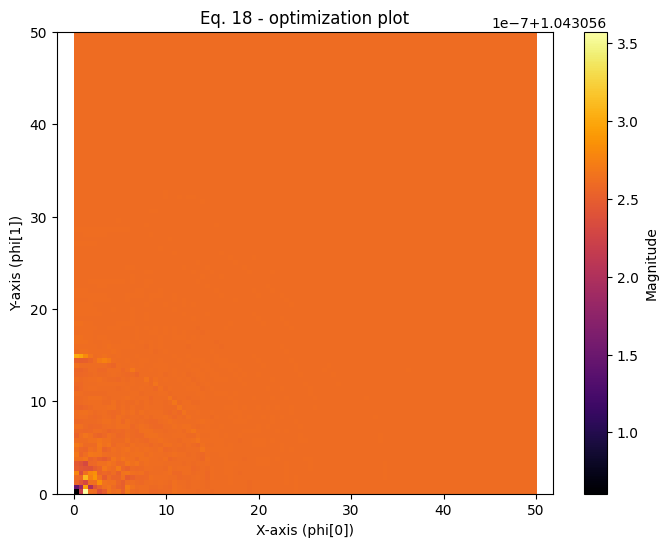

In [ ]:
# Compute the magnitude (ignoring phi[2] and phi[3])
#magnitudes = np.sqrt(phis[:, 0, 0]**2 + phis[:, 1, 0]**2)

# Reshape to 2D (51x51) for heatmap plotting
heatmap = np.array(S_signals).reshape(gridsize, gridsize)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(np.log(np.abs(heatmap[1:,1:])), origin='lower', extent=[0, 50, 0, 50], cmap='inferno')#, aspect='auto')
plt.colorbar(label="Magnitude")
plt.xlabel("X-axis (phi[0])")
plt.ylabel("Y-axis (phi[1])")
plt.title("Eq. 18 - optimization plot")
plt.axis('equal')
plt.show()

In [ ]:
min_index = np.argmin(heatmap)
min_index_2d = np.unravel_index(min_index, heatmap.shape)
x_min = x_values[min_index_2d[1]]
y_min = y_values[min_index_2d[0]]

print(f"Minimum value at index: {min_index_2d}")
print(f"x: {x_min}, y: {y_min}")
np.min(heatmap)

Minimum value at index: (np.int64(0), np.int64(1))
x: 0.5051505050505051, y: 0.0001


np.float64(-2.8378778612990883)